# TP1 - FMEA
 
##  Introducción 

El presente es el TP1 del curso [Diseño de Sistemas Críticos](https://sites.google.com/site/disenodesistemascriticos/home), agosto de 2017, [FI-UBA](http://www.fi.uba.ar).


## Enunciado

Hacer un FMEA del circuito que se indica a continuación 

* El circuito es utilizado para un probador de relés ferroviarios, es la parte que genera pulsos de reloj
* Considerar cada componente (listarlo)
* Indicar su modo de falla
* Evaluar la criticidad de cada falla en el funcionamiento del subsistema
* Buscar información en web, sobre tasa de falla
* Si una planilla no alcanza, continuar con otra hoja


[Enunciado completo](https://drive.google.com/file/d/0Bz_Vhed1HU1DeGppV1ZXQktqSjA/view)

## Resolución

Para el resultado [ver la sección Conclusiones](#Conclusiones)

El ejercicio se resolvió según la norma [IEC 60812](https://en.wikipedia.org/wiki/List_of_International_Electrotechnical_Commission_standards) en los siguientes pasos:

1. Se creó un archivo CSV con las *funciones de seguridad* y componentes del circuito (C10:capacitor, R11:resitor, etc)
1. Se creó un archivo CSV con las caracterísitcas de fiabilidad de cada clase de componente (resistores, capacitores, etc)
1. Se cargaron ambas tablas
1. Se cruzaron las tablas, seleccionando la información relevante
1. Se calculó la fiabilidad del subsistema


### Memoria de cálculo

**paso0)**

preparación del entorno de trabajo

In [78]:
from IPython.display import Image
import LbatlleSistemasCriticos 
tp1=LbatlleSistemasCriticos.fmea()

**paso1)** Se creó el archivo CSV de Componentes del circuito. A la función *Generación de reloj* se le otorgó la severidad III según IEC60812. 

Dado que todos componentes corresponden a la misma *función de seguridad* no se normalizó con otra tabla de *severidad por función*.



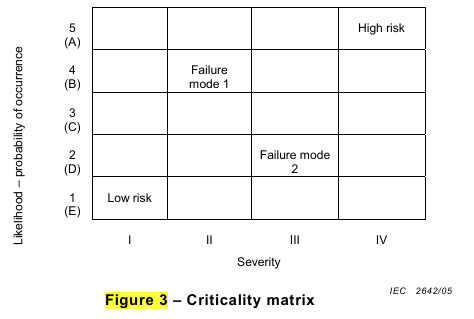

In [79]:
Image("IEC60812 - Figure 3 - Criticality matrix.png")

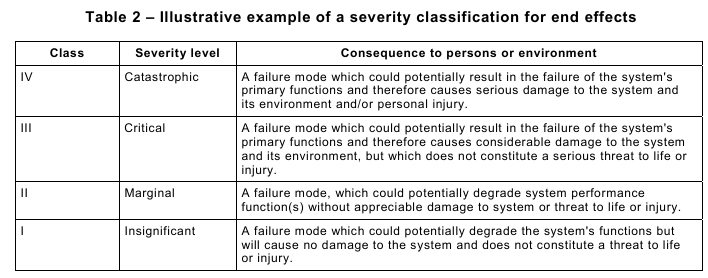

In [80]:
Image("IEC60812 - Table 2 - Illustrative example of a severity classification for end effects.png")

In [81]:
componentetipo=tp1.carga("TP1componentetipo.csv")
componentetipo

,IDComponente,IDTipo,Function,Severity
0,C10,Capacitor,Generación de reloj,III
1,C11,Capacitor,Generación de reloj,III
2,X1,Cristal,Generación de reloj,III
3,R16,Resistor,Generación de reloj,III
4,R17,Resistor,Generación de reloj,III
5,U4,Integrado,Generación de reloj,III
6,U5,Integrado,Generación de reloj,III
7,U6,Integrado,Generación de reloj,III
8,U8,Integrado,Generación de reloj,III


**paso2)** Se creó la tabla de especificaciones de fiabilidad para cada clase de componente. Se siguieron los estandares IEC62380 y/o MIL-HDBK-217F. 
Ésta tabla aplicará para los distintos circuitos del proyecto, y será reutilizable en  ótros con las mismas condiciones de entorno.

Los parámetros $\pi$ y $\lambda_B$ de cada clase sirven para calcular el parámetro $\lambda$ final. Las tasas de falla están en $[fallas/10^{6}hs]$.


In [82]:
tipoconfiabilidad=tp1.carga("TP1tipoconfiabilidad.csv")
tipoconfiabilidad

,IDTipo,Idmodo,Comentario,Idcausa,LambdaB,PiTemp,PiP,PiSR,PiS,PiQ,PiE,PiV,Lambda
0,Capacitor,Corto circuito (eléctrico),Tensión=25V,Envejecimiento,0.00099,1.30,NaN,1.0,NaN,10.0,1,1.0,0.010400
1,Capacitor,Circuito Abierto (eléctrico),Tensión=25V,Envejecimiento,0.00099,1.30,NaN,1.0,NaN,10.0,1,1.0,0.010400
2,Capacitor,Pérdidas (eléctricas),Tensión=25V,Envejecimiento,0.00099,1.30,NaN,1.0,NaN,10.0,1,1.0,0.010400
3,Resistor,Corto circuito (eléctrico),Metalfilm Potencia=0.125,Envejecimiento,0.00370,1.10,0.44,NaN,0.79,10.0,4,NaN,0.005659
4,Resistor,Circuito Abierto (eléctrico),Metalfilm Potencia=0.125,Envejecimiento,0.00370,1.10,0.44,NaN,0.79,10.0,4,NaN,0.005659
5,Resistor,Pérdidas (eléctricas),Metalfilm Potencia=0.125,Envejecimiento,0.00370,1.10,0.44,NaN,0.79,10.0,4,NaN,0.005659
6,Cristal,Falla de tolerancia (baja),NaN,Temperatura,NaN,NaN,NaN,NaN,NaN,2.1,3,NaN,0.069300
7,Cristal,Falla de tolerancia (alta),NaN,Temperatura,NaN,NaN,NaN,NaN,NaN,2.1,3,NaN,0.069300
8,Integrado,Corto circuito (eléctrico),Compuertas Lógicas,Temperatura,NaN,0.15,NaN,NaN,NaN,10.0,2,NaN,0.151000
9,Integrado,Circuito Abierto (eléctrico),Compuertas Lógicas,Temperatura,NaN,0.15,NaN,NaN,NaN,10.0,2,NaN,0.151000


En los [próximos pasos](#Conclusiones) se combinan circuito y componentes y se calcula la fiabilidad del subsistema

In [83]:
combinado=tp1.hacerjoin(componentetipo,tipoconfiabilidad,clave=['IDTipo','IDTipo'])
tp1.guarda(combinado,"TP1tablaFMEA.csv")

True

## Conclusiones

Luego de cargar las tablas de circuito y componentes, se combinan en la siguiente tabla *FMEA completa*:

<a id='Conclusiones'></a>


In [84]:
combinado[["IDComponente","IDTipo","Function","Severity","Idmodo","Idcausa","Lambda"]]

,IDComponente,IDTipo,Function,Severity,Idmodo,Idcausa,Lambda
0,C10,Capacitor,Generación de reloj,III,Corto circuito (eléctrico),Envejecimiento,0.010400
1,C10,Capacitor,Generación de reloj,III,Circuito Abierto (eléctrico),Envejecimiento,0.010400
2,C10,Capacitor,Generación de reloj,III,Pérdidas (eléctricas),Envejecimiento,0.010400
3,C11,Capacitor,Generación de reloj,III,Corto circuito (eléctrico),Envejecimiento,0.010400
4,C11,Capacitor,Generación de reloj,III,Circuito Abierto (eléctrico),Envejecimiento,0.010400
5,C11,Capacitor,Generación de reloj,III,Pérdidas (eléctricas),Envejecimiento,0.010400
6,X1,Cristal,Generación de reloj,III,Falla de tolerancia (baja),Temperatura,0.069300
7,X1,Cristal,Generación de reloj,III,Falla de tolerancia (alta),Temperatura,0.069300
8,R16,Resistor,Generación de reloj,III,Corto circuito (eléctrico),Envejecimiento,0.005659
9,R16,Resistor,Generación de reloj,III,Circuito Abierto (eléctrico),Envejecimiento,0.005659


Desde la perspectiva de RAMS el circuito tiene un solo camino, por lo tanto la fiabilidad de la *función de seguridad* será sumatoria de última columna:

$$ \lambda = \sum_{i=0}^{29}(\lambda_{i}) = 2,650954 $$

consideramos que el subsistema trabajará en la sección de $\lambda$ constante, y no es reparable, entonces:

**$$ MTBF = MTTF = 1 / \lambda = 37*10^4hs (aprox 43 anios)$$**
